In [7]:
import torch
import json
import numpy as np
from matplotlib import pyplot as plt
from os import path
from sklearn import manifold

In [24]:
checkpoint = "swat_2015_full_nn"
checkpoint_dir = path.join("checkpoint", checkpoint)
evaluation_losses = path.join(checkpoint_dir, "evaluation_losses.json")
with open(evaluation_losses, "r") as fd:
    data = json.load(fd)
losses = []
attack = []
for loss, label in data:
    losses.append(loss)
    attack.append(label)
losses = np.array(losses)
attack = np.array(attack, dtype=int)
losses = np.squeeze(losses, axis=1)

print(losses.shape)

[0 0 0 ... 0 0 0]
(395740, 51)


C:\Users\mland\AppData\Local\Temp\ipykernel_2268\2629828570.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  attack = np.array(attack, dtype=np.int)


C:\Users\mland\ICS-Attack-Detection\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mland\ICS-Attack-Detection\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


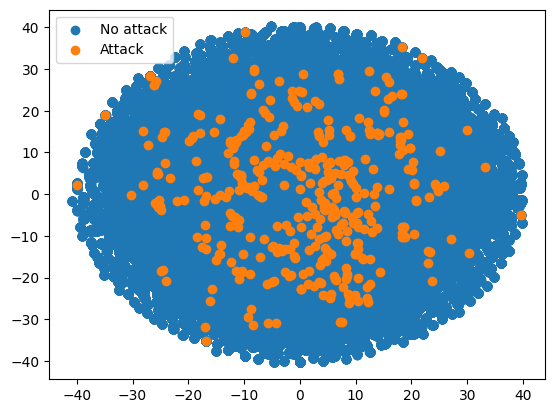

In [25]:
n_components = 2
tsne = manifold.TSNE(n_components=n_components, init="pca")
y = tsne.fit_transform(losses)

fig, ax = plt.subplots()
ax.scatter(y[attack == 0, 0], y[attack == 0, 1], label="No attack")
ax.scatter(y[attack == 1, 0], y[attack == 1, 1], label="Attack")

plt.legend()
plt.show()
